In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('input\ENOSE-rekap.xlsx')
df

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,SPAD,Treatment,Kode Daun
0,-0.05,0.01,-0.10,-0.02,0.0,-0.01,-0.01,-0.03,-0.01,38.6,DAUN,A1
1,-0.04,0.00,-0.12,-0.01,0.0,-0.01,0.00,-0.03,-0.01,37.9,DAUN,A1
2,-0.03,0.00,-0.06,-0.02,0.0,-0.01,0.00,-0.03,0.00,41.4,DAUN,A1
3,-0.04,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,41.8,DAUN,A1
4,-0.05,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,41.7,DAUN,A1
...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.00,0.00,-0.02,0.00,0.0,-0.01,0.00,0.00,0.00,NaN,DAUN,E3
896,0.00,-0.01,-0.02,0.00,0.0,0.00,0.00,0.00,0.01,NaN,DAUN,E3
897,0.00,-0.01,-0.02,0.00,0.0,-0.01,0.00,0.00,0.00,NaN,DAUN,E3
898,0.00,-0.01,-0.03,-0.01,0.0,-0.01,0.00,0.00,0.00,NaN,DAUN,E3


In [29]:
df['MQ3']

0      0.01
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
895    0.00
896   -0.01
897   -0.01
898   -0.01
899   -0.01
Name: MQ3, Length: 900, dtype: float64

In [3]:
df.describe()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,SPAD
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,600.000000
mean,-0.012111,-0.001767,-0.026956,-0.002878,-0.000678,-0.002233,-0.002100,-0.002489,-0.001456,43.801611
std,0.024662,0.009391,0.057775,0.009964,0.005155,0.004574,0.006581,0.009220,0.004763,6.175806
min,-0.130000,-0.030000,-0.190000,-0.040000,-0.020000,-0.020000,-0.030000,-0.030000,-0.020000,24.600000
25%,-0.030000,0.000000,-0.060000,-0.010000,0.000000,0.000000,-0.010000,0.000000,0.000000,40.300000
50%,-0.010000,0.000000,-0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.550000
75%,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.525000
max,0.050000,0.040000,0.140000,0.020000,0.030000,0.010000,0.010000,0.020000,0.020000,66.100000


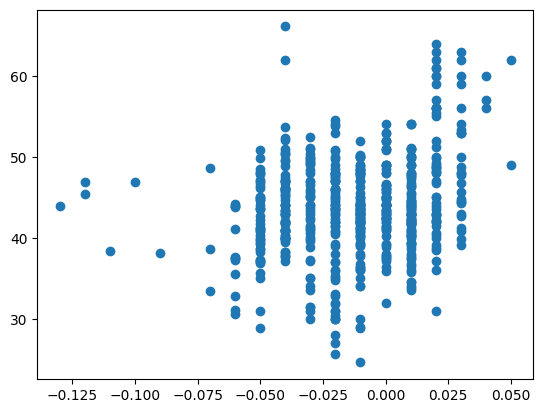

In [33]:
plt.scatter(df['MQ2'], df['SPAD'])
plt.show()

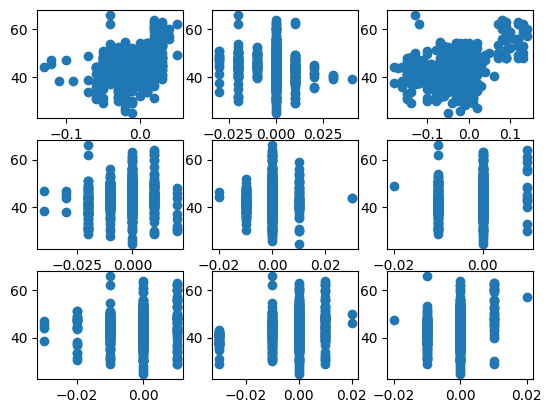

In [38]:
plt.figure()

plt.subplot(331)
plt.scatter(df['MQ2'], df['SPAD'])

plt.subplot(332)
plt.scatter(df['MQ3'], df['SPAD'])

plt.subplot(333)
plt.scatter(df['MQ4'], df['SPAD'])

plt.subplot(334)
plt.scatter(df['MQ5'], df['SPAD'])

plt.subplot(335)
plt.scatter(df['MQ6'], df['SPAD'])

plt.subplot(336)
plt.scatter(df['MQ7'], df['SPAD'])

plt.subplot(337)
plt.scatter(df['MQ8'], df['SPAD'])

plt.subplot(338)
plt.scatter(df['MQ9'], df['SPAD'])

plt.subplot(339)
plt.scatter(df['MQ135'], df['SPAD'])



In [ ]:
atribut_kategori = ['Pohon', 'Kode Daun', 'Treatment']
for i, col in enumerate(atribut_kategori):
    df[col].value_counts().plot(kind='barh')
    plt.title(col)
    plt.show()

In [ ]:
atribut_numerik = ['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ9', 'MQ135', 'SPAD']
for i, col in enumerate(atribut_numerik):
    df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [ ]:
sns.pairplot(df[atribut_numerik])
plt.show()

In [ ]:
sns.pairplot(df[atribut_kategori])
plt.show()

In [ ]:
df_drop = df.drop(labels=['Pohon', 'Kode Daun', 'Treatment'], axis=1)
korelasi = df.groupby('Pohon').corr()
plt.figure(figsize=(10,10))
sns.heatmap(korelasi, vmax=1.0, square=True, annot=True,cmap='cubehelix')
plt.title('Korelasi Berdasarkan Kategori Atribut')

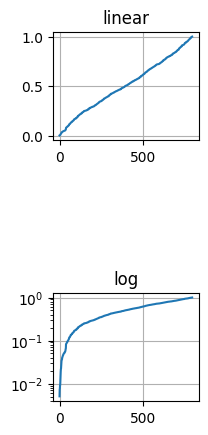

In [25]:
np.random.seed(19680801)

y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

plt.figure()

plt.subplot(333)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.subplot(339)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)